In [20]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [2]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Regino Balogo
[nltk_data]     Jr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:
# Load dataset
fake_df = pd.read_csv("Fake.csv")

In [6]:
print("Initial Data:")
print(fake_df.head())

Initial Data:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  
0  Donald Trump just couldn t wish all Americans ...  
1  House Intelligence Committee Chairman Devin Nu...  
2  On Friday, it was revealed that former Milwauk...  
3  On Christmas day, Donald Trump announced that ...  
4  Pope Francis used his annual Christmas Day mes...  


In [7]:
# Keep only relevant columns
fake_df = fake_df[['title', 'text']].dropna()
print("Data after dropping missing values:")
print(fake_df.head())


Data after dropping missing values:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  
0  Donald Trump just couldn t wish all Americans ...  
1  House Intelligence Committee Chairman Devin Nu...  
2  On Friday, it was revealed that former Milwauk...  
3  On Christmas day, Donald Trump announced that ...  
4  Pope Francis used his annual Christmas Day mes...  


In [8]:
# Combine title and text
fake_df['content'] = fake_df['title'] + " " + fake_df['text']

In [9]:
# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [10]:
# Apply text cleaning
fake_df['clean_text'] = fake_df['content'].apply(clean_text)
print("Data after text cleaning:")
print(fake_df[['content', 'clean_text']].head())

Data after text cleaning:
                                             content  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                          clean_text  
0  donald trump sends embarrassing new year’s eve...  
1  drunk bragging trump staffer started russian c...  
2  sheriff david clarke becomes internet joke thr...  
3  trump obsessed even obama’s name coded website...  
4  pope francis called donald trump christmas spe...  


In [11]:
# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(fake_df['clean_text'])

In [12]:
# Apply K-Means clustering
num_clusters = 3  # Try clustering articles into 3 groups
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
fake_df['cluster'] = kmeans.fit_predict(X)
print("Cluster assignments:")
print(fake_df[['title', 'cluster']].head())

Cluster assignments:
                                               title  cluster
0   Donald Trump Sends Out Embarrassing New Year’...        2
1   Drunk Bragging Trump Staffer Started Russian ...        2
2   Sheriff David Clarke Becomes An Internet Joke...        1
3   Trump Is So Obsessed He Even Has Obama’s Name...        2
4   Pope Francis Just Called Out Donald Trump Dur...        1


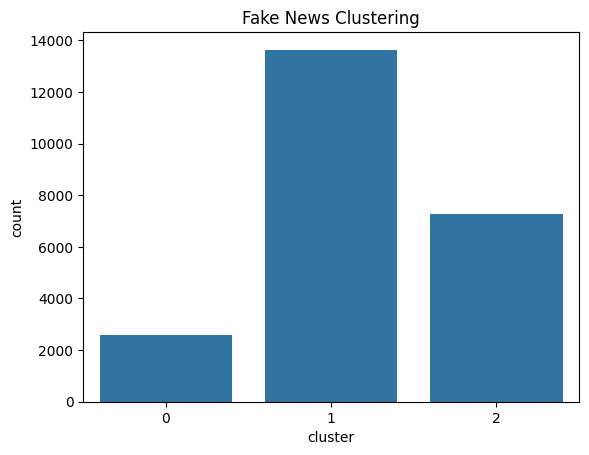

In [13]:
# Visualizing the clusters
sns.countplot(x=fake_df['cluster'])
plt.title("Fake News Clustering")
plt.show()

In [17]:
# Apply LDA for topic modeling
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
topic_matrix = lda.fit_transform(X)


In [18]:
# Show top words for each topic
words = np.array(vectorizer.get_feature_names_out())
top_words = []
for topic_idx, topic in enumerate(lda.components_):
    top_words.append(" ".join(words[np.argsort(topic)][-10:]))
    print(f"Topic {topic_idx}: {top_words[-1]}")

Topic 0: republican said vote state president people republicans would obama trump
Topic 1: students us school gun people video muslim said black police
Topic 2: one said like people clinton president video donald hillary trump
Topic 3: judge maxine jeanine nancy bundy flint waters video moore pelosi
Topic 4: investigation intelligence comey us hillary russian fbi russia clinton trump


In [21]:
# Save model and vectorizer
joblib.dump(kmeans, "kmeans_fake_news.pkl")
joblib.dump(lda, "lda_fake_news.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']